In [28]:
from pathlib import Path
BASE_PATH = Path("/home/anto/Downloads/1000_samples_experiments")
EXP_TIMESTAMP = "1683253453.8699663"

# Load dataset info

In [29]:
import pandas as pd
from experiments.synthetic_datasets.common import load_dataset

sinusoid_ds_info = []
pacman_ds_info = []
all_ds_info = []
for ds_f in Path(BASE_PATH / "synthetic_datasets/datasets").iterdir():
    ds = load_dataset(ds_f)
    if ds.params.get("a", None):
        pacman_ds_info.append({"id": ds.id, **ds.params, **ds.complexity_report})
    else:
        sinusoid_ds_info.append({"id": ds.id, **ds.params,**ds.complexity_report})
    all_ds_info.append({"id": ds.id, **ds.params, **ds.complexity_report})

pacman_ds_info = pd.DataFrame(pacman_ds_info)
sinusoid_ds_info = pd.DataFrame(sinusoid_ds_info)
all_ds_info = pd.DataFrame(all_ds_info)
all_ds_info.sample(5)

,id,n,a,r,p,dim,gamma,test_size,seed,n_samples,n_features,score,complexities,prior_probability,beta,rho,theta,sep,clusters_per_class
9,446d99c6135509a5b89a4fb06c0ff158,300,NaN,0.0,1,NaN,NaN,0.3,3653403230,300,2,0.363,"{'f1': 0.28, 'f1v': 0.139, 'f2': 0.901, 'f3': ...","[0.5, 0.5]",95.0,0.2,10.0,NaN,NaN
13,8ffab53aa4fee600894bdace01d55a32,1000,0.5,0.1,1,2.0,10.0,0.3,2735729614,1000,2,0.404,"{'f1': 0.546, 'f1v': 0.376, 'f2': 0.541, 'f3':...","[0.5, 0.5]",NaN,NaN,NaN,NaN,NaN
32,a5430a99ae3cb838936063502333466d,1000,NaN,0.0,1,NaN,NaN,0.3,3653403230,1000,2,0.320,"{'f1': 0.233, 'f1v': 0.124, 'f2': 0.551, 'f3':...","[0.5, 0.5]",1.0,0.2,10.0,NaN,NaN
39,cec6898d9125a49f17582ff723561bd5,1000,0.5,0.2,1,2.0,10.0,0.3,3653403230,1000,2,0.459,"{'f1': 0.695, 'f1v': 0.532, 'f2': 0.612, 'f3':...","[0.5, 0.5]",NaN,NaN,NaN,NaN,NaN
40,0065ebb558519585b7ce214827e64d9a,1000,0.1,0.0,1,2.0,10.0,0.3,2195314464,1000,2,0.207,"{'f1': 0.206, 'f1v': 0.115, 'f2': 0.029, 'f3':...","[0.5, 0.5]",NaN,NaN,NaN,NaN,NaN


# Load experiments results

In [30]:
import pandas as pd
from budgetsvm import optimization

df = pd.read_json(BASE_PATH / f"results/{EXP_TIMESTAMP}.json")

df["budget_percentage"] = df["model_name"].apply(
    lambda x: float(x.split("_")[0]) if "full" not in x else 1.0
)

total_train_time_sec = df.train_time.sum()
df.train_time = df.train_time.div(60)
df = df.rename({"train_time": "train_time_min"}, axis=1)

df_success = df.dropna().copy()
# df_success = df.copy()
# df_success["score"] = df_success.score.apply(lambda x: x if type(x)==float else "0.0")

df_success = df_success.astype(
    {
        "dataset": "string",
        "model_name": "string",
        "optimal": "bool",
        "params": "object",
        "score": "float",
        "budget": "float",
        "num_sv": "float",
        "train_time_min": "float",
    }
)


full_budget_score = df_success.query("budget==inf")[["dataset", "score"]]
df_success = df_success.join(
    full_budget_score.set_index("dataset"), on="dataset", rsuffix="_full_budget"
)
df_success["score_ratio"] = df_success["score"] / df_success["score_full_budget"]

# df_success["dataset"] = df_success["dataset"].apply(lambda x: x[-10:])

df_success.query("dataset == '6928fa1a93de586a988e1419fc3b048b'")

,dataset,model_UUID,model_name,optimal,params,score,budget,num_sv,train_time_min,budget_percentage,score_full_budget,score_ratio
16,6928fa1a93de586a988e1419fc3b048b,459d0328-6f22-4d07-874c-45d748e0655e,full_budget,True,"{'C': 1, 'kernel': 'PrecomputedKernel(Gaussian...",0.860000,inf,137.0,2.839228,1.0,0.86,1.000000
17,6928fa1a93de586a988e1419fc3b048b,781f1d57-54cb-4592-b07a-f672ae81ab21,0.90_budget,False,"{'C': 10, 'kernel': 'PrecomputedKernel(Gaussia...",0.613333,123.0,123.0,32.539333,0.9,0.86,0.713178
18,6928fa1a93de586a988e1419fc3b048b,a633db8a-3dc0-4ece-92d1-a315d0054123,0.80_budget,False,"{'C': 100, 'kernel': 'PrecomputedKernel(Linear...",0.733333,109.0,3.0,32.940733,0.8,0.86,0.852713
19,6928fa1a93de586a988e1419fc3b048b,62a7cd09-fb44-49ec-b1c9-2ff013c67894,0.70_budget,False,"{'C': 10, 'kernel': 'PrecomputedKernel(Polynom...",0.703333,95.0,6.0,32.073877,0.7,0.86,0.817829
20,6928fa1a93de586a988e1419fc3b048b,c32a1764-6499-4fdd-bce6-bd65e9001277,0.60_budget,False,"{'C': 100, 'kernel': 'PrecomputedKernel(Gaussi...",0.583333,82.0,82.0,22.205601,0.6,0.86,0.678295
21,6928fa1a93de586a988e1419fc3b048b,72f6d20b-093d-4c3b-b1db-b3162d6bd174,0.50_budget,False,"{'C': 10, 'kernel': 'PrecomputedKernel(Gaussia...",0.576667,68.0,68.0,20.462914,0.5,0.86,0.670543
22,6928fa1a93de586a988e1419fc3b048b,a0af5ea7-204b-4065-b78f-3da9759e2f97,0.40_budget,False,"{'C': 10, 'kernel': 'PrecomputedKernel(Gaussia...",0.530000,54.0,55.0,21.548683,0.4,0.86,0.616279
23,6928fa1a93de586a988e1419fc3b048b,0c207ff5-65f5-4ddb-832d-a0ef2aaaa84c,0.30_budget,False,"{'C': 0.1, 'kernel': 'PrecomputedKernel(Polyno...",0.606667,41.0,9.0,32.948067,0.3,0.86,0.705426


In [31]:
import datetime

print(f"{datetime.timedelta(seconds=total_train_time_sec)} tot. training time")

2 days, 15:11:59.006294 tot. training time


In [32]:
df.dataset.unique()

array(['a5430a99ae3cb838936063502333466d',
       'fba90d74afdad10779cebbc859a1e7f9',
       '6928fa1a93de586a988e1419fc3b048b',
       'ceebcc3e2a6d3fc443219778614be3e8',
       'f20904a07598777e2e4232185da84834',
       '2fa60990c090efd900bbb0f2ad794606',
       '6d1b8b19811bbc4a07801d72591e29d1',
       '0dca4f0d524c6f06134b63c6396e360e',
       '9a198c96a10ee93b141abe06073f32ec',
       '52f8e095edca99abf521370e7be6e753',
       '9a36d69d0a4633c000cb48abbcbf0cb3',
       '0065ebb558519585b7ce214827e64d9a',
       '3a17afc3942cba38f05410a37c308959',
       '1e9ec10719c9b8e994629b57f501b861',
       '35c6a0f6e03b4d9fd154fe388329e6b8',
       '305c24150bc8507ac447cf629642d77f',
       '6e4b4841910190abd21a4ca730b451c1',
       '8f19e326f2c9e4cd9158d44a04d0354e',
       '940bafc0cb4d5ac8051c7c5bea92f24b',
       '7d722876fa36c01d5eadbfc24de0fb96',
       '388fd266a9f7982146a46fc5b2b88e97',
       '3143ee653da6ed5e1e7641b909bde6aa',
       'f9d96a6923d7ac8b7d6b61057f4b6fb5',
       '7af

In [33]:
all_model_params = pd.json_normalize(df_success["params"])
display(all_model_params.kernel.value_counts())
print()
display(all_model_params.C.value_counts())

PrecomputedKernel(GaussianKernel())               63
PrecomputedKernel(GaussianKernel(sigma=0.1))      49
PrecomputedKernel(PolynomialKernel(2))            34
PrecomputedKernel(GaussianKernel(sigma=0.01))     20
PrecomputedKernel(PolynomialKernel(5))            12
PrecomputedKernel(LinearKernel())                  7
PrecomputedKernel(PolynomialKernel(10))            6
PrecomputedKernel(GaussianKernel(sigma=1e-05))     1
Name: kernel, dtype: int64

100.0    72
1.0      70
10.0     44
0.1       6
Name: C, dtype: int64

# Results by dataset type

In [70]:
from experiments.synthetic_datasets.common import load_dataset
import matplotlib.gridspec as gridspec

def plot_res(dataframe, hue, metrics=["score"]):       
    fig, axs = plt.subplots(1,3, figsize=(16,6))
    
    for ax in axs.flat[:2]:
        ax.set_xlim((0.2, 1.1))
        ax.set_ylim((0.2, 1.1))
        ax.set_box_aspect(1)
    
    axs = iter(axs.flat)
                
    ax = next(axs)
    
    if "beta" in dataframe.columns:
        dataframe["group_id"] = dataframe.apply(lambda x: f"beta={x.beta} rho={x.rho} theta={x.theta}",axis=1)
    else:
        dataframe["group_id"] = dataframe.apply(lambda x: f"a={x.a} r={x.r} p={x.p}",axis=1)
    
    g = sns.lineplot(
        data=group, 
        x="budget_percentage", 
        y="score", 
        hue="group_id", 
        ax=ax, 
        legend=False,
        err_style="bars", 
        errorbar=lambda x: (x.min(), x.max())
    )
    ax.axhline(y=0.5, linestyle="--", linewidth=0.5)
    
        
    ax = next(axs)
    ax.axline((0, 0), (1, 1), linestyle="--", linewidth=0.5)
    sns.lineplot(
        data=dataframe,
        x="budget_percentage",
        y="score_ratio",
        hue="group_id",
        orient="x",
        legend=False,
        ax=ax,
        err_style="bars", 
        errorbar=lambda x: (x.min(), x.max())
    )
    g = sns.scatterplot(
        data=dataframe,
        x="budget_percentage",
        y="score_ratio",
        hue="group_id",
        style="optimal",
        size="optimal",
        markers={True: "o", False: "X"},
        ax=ax,
    )
    legend = g.get_legend()
    legend.set_bbox_to_anchor((0.8, 0.4))
        
    for label_text_obj in legend.get_texts():
        ds_id_label = label_text_obj.get_text()
        l = f"{ds_id_label[-10:]}" 
        label_text_obj.set_text(l)
    
    sns.despine()
    
    
    ds_ids = dataframe["dataset_id"].unique().tolist()

    # plot one dataset
    ax = next(axs)
    
    ds_id = ds_ids[0]
    ds = load_dataset(Path(BASE_PATH / f"synthetic_datasets/datasets/{ds_id}.json"))
    sns.scatterplot(x=ds.X.T[0], y=ds.X.T[1], hue=ds.y, palette="deep", legend=False, ax=ax)

    metrics_str = ""

    if "score" in metrics:
        metrics_str += f"score: {ds.complexity_report['score']}"
    for metric_key in metrics:
        if metric_key in ds.complexity_report['complexities']:
            metrics_str += f" {metric_key}: {ds.complexity_report['complexities'][metric_key]}"

    l = f"{ds_id[-10:]}\n{metrics_str}" 

    ax.title.set_text(l)
    #ax.title.set_color(cmap[ds_id])
    ax.set_box_aspect(1)

    plt.show()
   

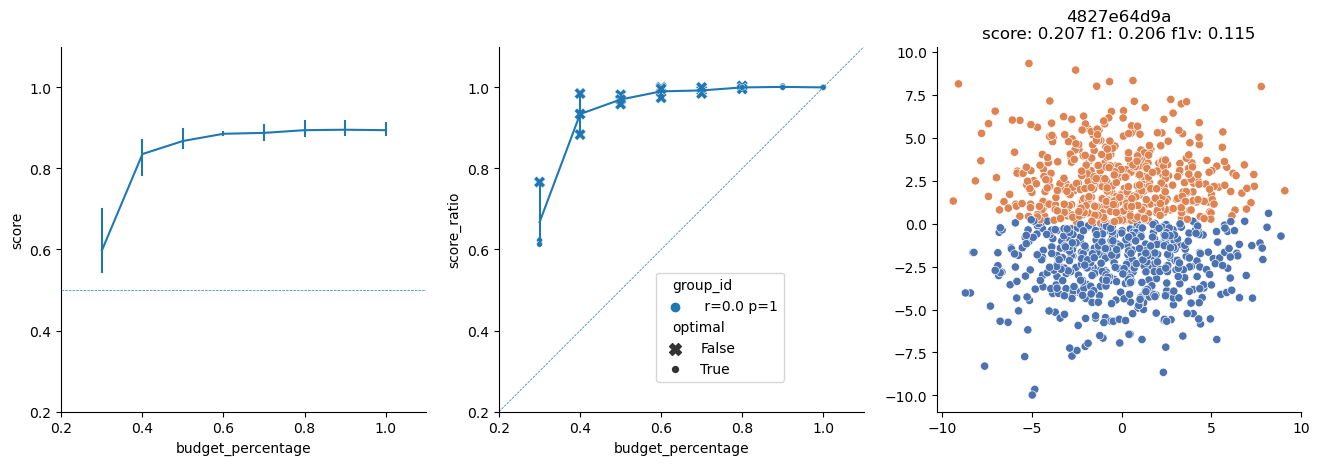

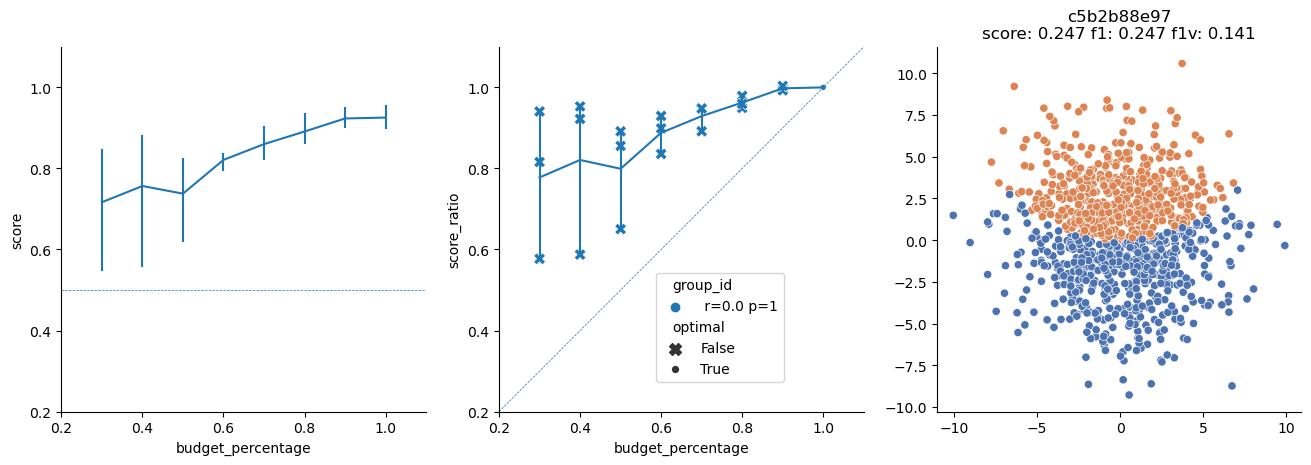

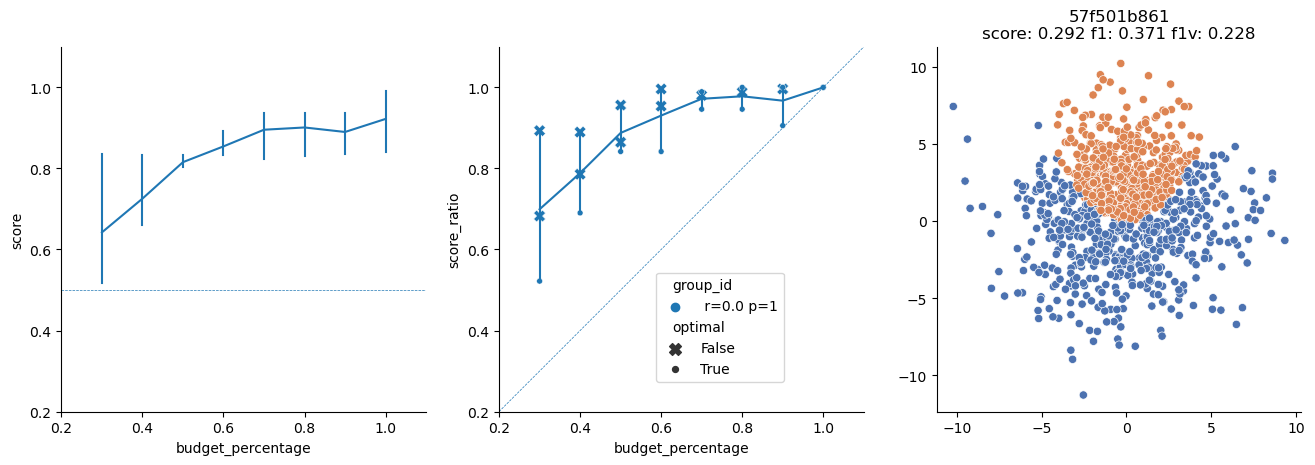

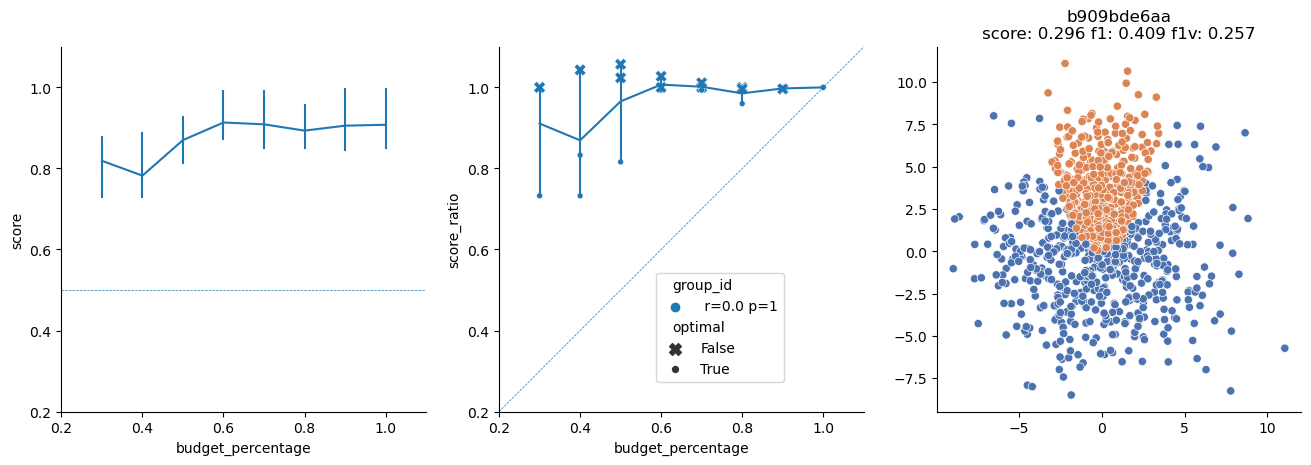

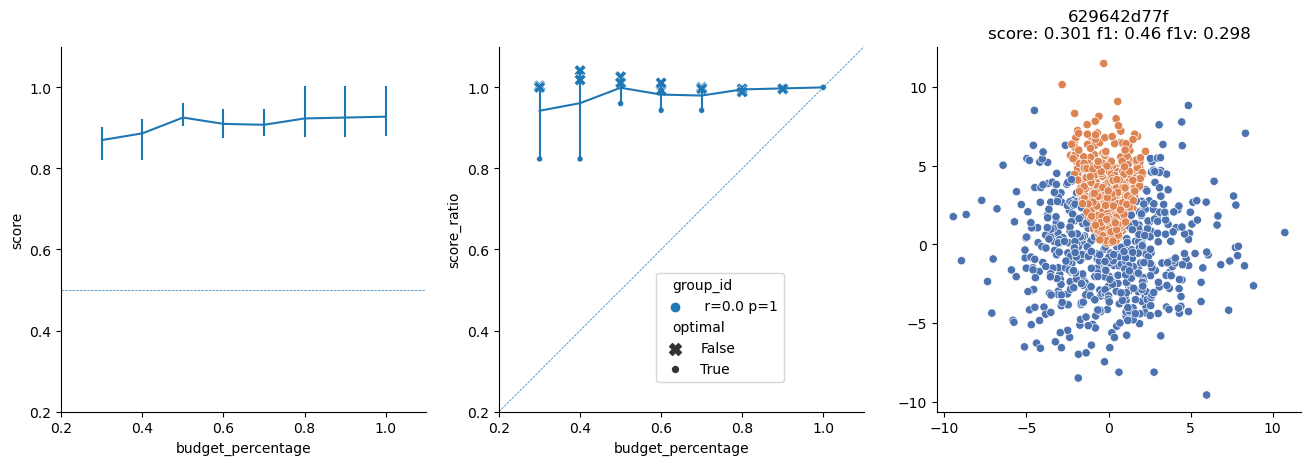

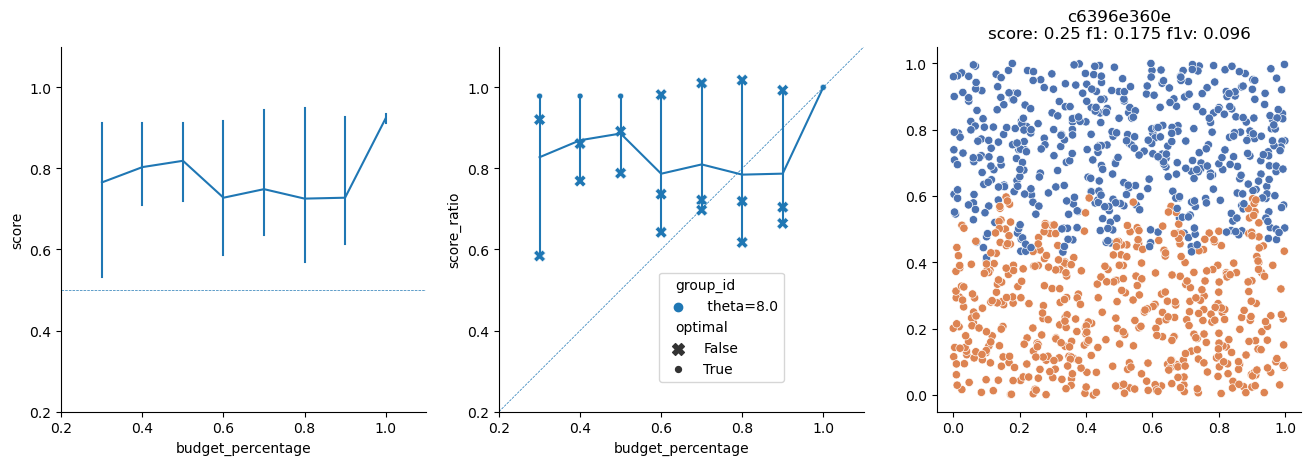

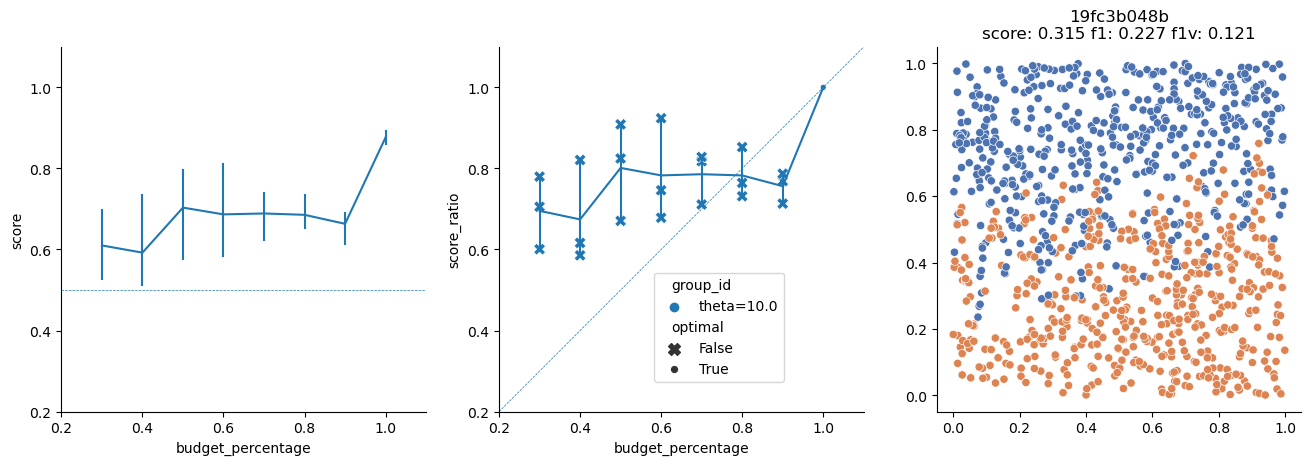

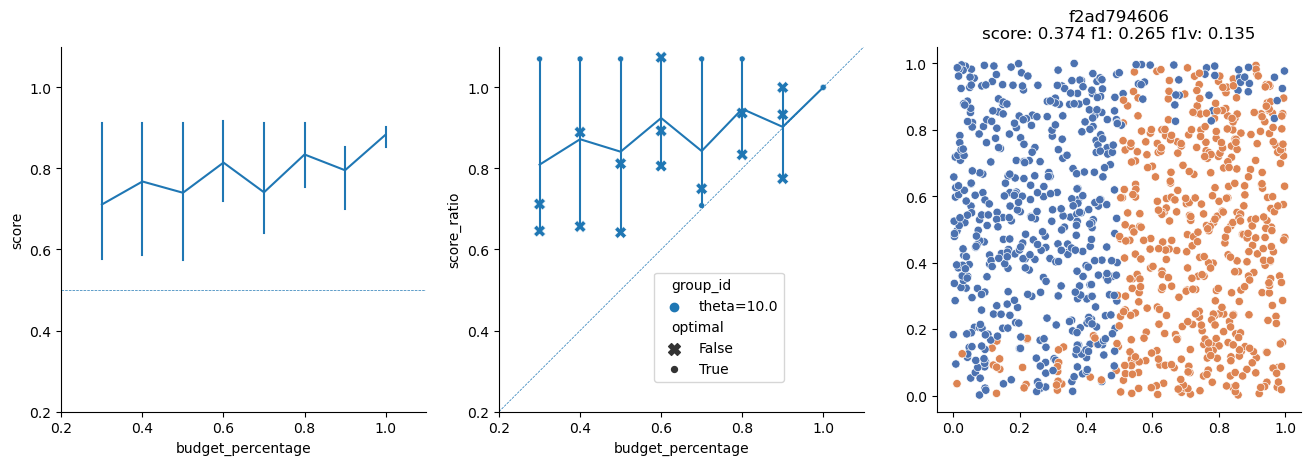

In [71]:
res_df = (
    df_success.set_index("dataset")
    .join(all_ds_info.set_index("id"), rsuffix="_ds_param")
    .reset_index()
    .rename(
        {
            "index": "dataset_id",
        },
        axis=1,
    )
)

sinusoid_res = res_df.query("a.isnull()").dropna(axis=1).copy()
pacman_res = res_df.query("rho.isnull()").dropna(axis=1).copy()

metrics = ["score", "f1", "f1v"]

id_map = {}
for i, group in pacman_res.groupby(by=["a", "r", "p"]):
    ds_ids = group.dataset_id.unique().tolist()
    grouped_id = "-".join([x[-5:] for x in ds_ids])
    for ds_id in ds_ids:
        id_map[ds_id] = grouped_id
    plot_res(group, "dataset_id", metrics)
    #plot_group_ds(group)

for i, group in sinusoid_res.groupby(by=["beta", "rho", "theta"]):
    ds_ids = group.dataset_id.unique().tolist()
    grouped_id = "-".join([x[-5:] for 2x in ds_ids])
    for ds_id in ds_ids:
        id_map[ds_id] = grouped_id
    plot_res(group, "dataset_id", metrics)
    #plot_group_ds(group)


pacman_res["grouped_id"] = pacman_res.dataset_id.apply(lambda x: id_map[x])
sinusoid_res["grouped_id"] = sinusoid_res.dataset_id.apply(lambda x: id_map[x])

# Sklearn SVC

In [99]:
from sklearn.svm import SVC as sklearnSVC
from experiments.utils import Timer
# default_gamma = 1 / (len(X_train[0]) * np.var(X_train))

res = []
for ds_id in df.dataset.unique():
    ds = load_dataset(Path(BASE_PATH / f"synthetic_datasets/datasets/{ds_id}.json"))

    with Timer() as t:
        sklearn_model = sklearnSVC(C=1.0, kernel="rbf")
        sklearn_model.fit(ds.X_train, ds.y_train)
    res.append({
        "dataset": ds_id,
        "score": sklearn_model.score(ds.X_test, ds.y_test),
        "num_sv": sum(sklearn_model.n_support_),
        "train_time":t.time
    })

sklearn_df = pd.DataFrame(res)

res = df_success.query("model_name=='full_budget'")[['dataset','score', 'num_sv', 'train_time_min']]\
        .rename({"train_time_min": "train_time"}, axis=1)\
        .set_index("dataset")\
        .join(sklearn_df.set_index("dataset"), rsuffix="_skl")

res["train_time"] *= 60
res[sorted(res.columns)]

,num_sv,num_sv_skl,score,score_skl,train_time,train_time_skl
dataset,,,,,,
a5430a99ae3cb838936063502333466d,79.0,216,0.893333,0.896667,171.376812,0.015108
fba90d74afdad10779cebbc859a1e7f9,142.0,210,0.876667,0.883333,170.453522,0.013595
6928fa1a93de586a988e1419fc3b048b,137.0,194,0.860000,0.856667,170.353660,0.009278
ceebcc3e2a6d3fc443219778614be3e8,155.0,163,0.893333,0.920000,170.601513,0.006926
f20904a07598777e2e4232185da84834,688.0,190,0.853333,0.930000,170.993205,0.007030
2fa60990c090efd900bbb0f2ad794606,126.0,172,0.903333,0.936667,170.959026,0.009696
6d1b8b19811bbc4a07801d72591e29d1,691.0,134,0.933333,0.940000,169.647734,0.009722
0dca4f0d524c6f06134b63c6396e360e,78.0,147,0.923333,0.930000,171.088955,0.005478
9a198c96a10ee93b141abe06073f32ec,94.0,138,0.913333,0.940000,170.709806,0.005225


# Results all datasets

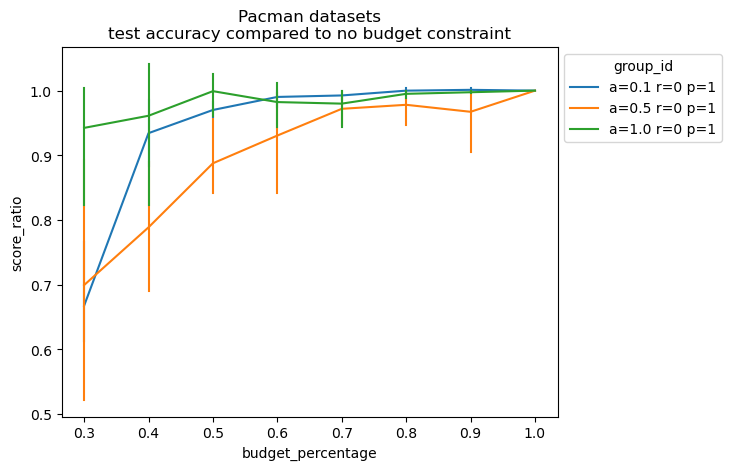

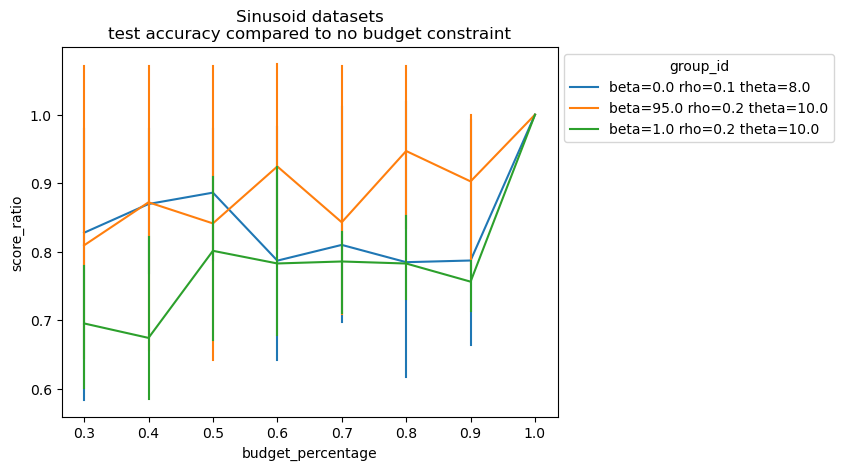

In [41]:
res_df = (
    df_success.set_index("dataset")
    .join(all_ds_info.set_index("id"), rsuffix="_ds_param")
    .reset_index()
    .rename(
        {
            "index": "dataset_id",
        },
        axis=1,
    )
)

pacman_res = res_df.query("rho.isnull()").dropna(axis=1).copy()

pacman_res["group_id"] = pacman_res.apply(lambda x: f"a={x.a} r={x.r} p={x.p}",axis=1)
ax = sns.lineplot(
    data=pacman_res,
    x="budget_percentage",
    y="score_ratio",
    hue="group_id",
    orient="x",
    legend=True,
    err_style="bars", 
    errorbar=lambda x: (x.min(), x.max())
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("Pacman datasets\ntest accuracy compared to no budget constraint");
plt.show()

sinusoid_res = res_df.query("a.isnull()").dropna(axis=1).copy()
sinusoid_res["group_id"] = sinusoid_res.apply(lambda x: f"beta={x.beta} rho={x.rho} theta={x.theta}",axis=1)
ax = sns.lineplot(
    data=sinusoid_res,
    x="budget_percentage",
    y="score_ratio",
    hue="group_id",
    orient="x",
    legend=True,
    err_style="bars", 
    errorbar=lambda x: (x.min(), x.max())
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("Sinusoid datasets\ntest accuracy compared to no budget constraint");

# Same budget as unconstrained model - GridSearchCV

    full_budget_model = GridSearchCV(SVC(), params)
    100_p_model = GridSearchCV(SVC(budget=full_budget_model.num_SV), params)
    

In [1]:
import pandas as pd
from budgetsvm import optimization

df = pd.read_json("/home/anto/Downloads/experiments/results/1680714507.691396_100per_budget.json")
df

,dataset,model_UUID,model_name,optimal,params,obj_fn_value,score,budget,num_sv,train_time
0,c909c284a99cdf44d8d51d2ea62d334d,e313b4e3-bea0-4183-ae2d-718bad153d76,unconstrained,True,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",56.298203,0.911111,inf,63,23.127109
1,c909c284a99cdf44d8d51d2ea62d334d,b9cb4076-d425-4ac0-b2ba-c3136d8ec27a,100perc_budget,True,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",56.298203,0.911111,inf,63,22.502951
2,4866a56c176db9624e6d8bb02f2de8e1,190ba03a-058a-4eba-a2ec-3f44fbfa1b26,unconstrained,True,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",50.917990,0.933333,inf,51,22.412940
3,4866a56c176db9624e6d8bb02f2de8e1,8376921d-c5b3-4b13-a3c3-67fde653de55,100perc_budget,True,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",50.917990,0.933333,inf,51,22.564765
4,6340ead3f8a9ea762eaf5c2132fc757a,bae6ba03-0073-41ff-8e6b-d7c68e88eaaf,unconstrained,True,"{'C': 100.0, 'kernel': 'GaussianKernel(sigma=0...",231.114726,0.933333,inf,47,22.563301
5,6340ead3f8a9ea762eaf5c2132fc757a,e517287e-881b-4070-bbf5-e8a3b26c5423,100perc_budget,True,"{'C': 100.0, 'kernel': 'GaussianKernel(sigma=0...",231.114726,0.933333,inf,47,22.390710
6,ff89c17b0ee181abd72e691a10b27bf9,6d191cb9-a3bc-44c2-9212-74189a19737d,unconstrained,True,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",41.277807,0.966667,inf,67,22.154327
7,ff89c17b0ee181abd72e691a10b27bf9,5abd087e-1acb-4bae-87d8-dbf364900db5,100perc_budget,True,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",41.277807,0.966667,inf,67,22.068701
8,96ee0f04878ee282e3470b3df861b457,9ddb2599-968e-4a0b-988d-a87ae1cebcc8,unconstrained,True,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",3.326407,1.000000,inf,14,21.458484
9,96ee0f04878ee282e3470b3df861b457,18d0d1c1-15d6-4763-9d65-05a1c3a89fcd,100perc_budget,True,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",3.326407,1.000000,inf,14,21.599665


In [2]:
total_train_time_sec = df.train_time.sum()
df.train_time = df.train_time.div(60)
df = df.rename({"train_time": "train_time_min"}, axis=1)
df["dataset_short"] = df["dataset"].apply(lambda x: x[-10:])
df.set_index("dataset_short")

def dict_eq(d1,d2):
    return list(d1.keys()).sort() == list(d2.keys()).sort() and list(d2.items()).sort() == list(d2.items()).sort()

res = {}
for ds, group in df.groupby("dataset_short"):
    unc = group.query("model_name=='unconstrained'").iloc[0]
    bud = group.query("model_name=='100perc_budget'").iloc[0]
    
    res[ds] = {
        "same_obj": unc["obj_fn_value"] == bud["obj_fn_value"],
        "same_score": unc["score"] == bud["score"],
        "same_num_sv": unc["num_sv"] == bud["num_sv"],
        "both_optimal": unc["optimal"] and bud["optimal"],
        "same_params": dict_eq(unc["params"], bud["params"])
    }

pd.DataFrame(res).T

,same_obj,same_score,same_num_sv,both_optimal,same_params
1a10b27bf9,True,True,True,True,True
2132fc757a,True,True,True,True,True
2ea62d334d,True,True,True,True,True
3df861b457,True,True,True,True,True
8ba8202e51,True,True,True,True,True
b02f2de8e1,True,True,True,True,True


# Same budget as unconstrained model - no CV

In [1]:
name = "1681897515.914336_100per_budget_no_cv"

    for each parameter combination:
        train SVC()
        train SVC(budget=100%)

In [2]:
import pandas as pd
from budgetsvm import optimization

df = pd.read_json(f"experiments/results/{name}.json")
df

,dataset,model_name,params,score,obj_fn_value,num_sv,budget,optimal,train_time
0,52f8e095edca99abf521370e7be6e753,unconstrained,"{'C': '0.1', 'kernel': 'GaussianKernel(sigma=1...",0.883333,64.127552,182,inf,True,8.066717
1,52f8e095edca99abf521370e7be6e753,100perc_budget,"{'C': '0.1', 'kernel': 'GaussianKernel(sigma=1...",0.883333,64.127552,123,182.0,True,8.022763
2,52f8e095edca99abf521370e7be6e753,unconstrained,"{'C': '0.1', 'kernel': 'GaussianKernel(sigma=0...",0.883333,64.127552,182,inf,True,8.008634
3,52f8e095edca99abf521370e7be6e753,100perc_budget,"{'C': '0.1', 'kernel': 'GaussianKernel(sigma=0...",0.883333,64.127552,123,182.0,True,8.004763
4,52f8e095edca99abf521370e7be6e753,unconstrained,"{'C': '0.1', 'kernel': 'GaussianKernel(sigma=0...",0.883333,64.127552,182,inf,True,8.017903
...,...,...,...,...,...,...,...,...,...
235,305c24150bc8507ac447cf629642d77f,100perc_budget,"{'C': '100', 'kernel': 'PolynomialKernel(2)'}",0.900000,51.435274,103,182.0,True,7.740720
236,305c24150bc8507ac447cf629642d77f,unconstrained,"{'C': '100', 'kernel': 'PolynomialKernel(5)'}",0.886667,51.435274,182,inf,True,8.003745
237,305c24150bc8507ac447cf629642d77f,100perc_budget,"{'C': '100', 'kernel': 'PolynomialKernel(5)'}",0.900000,51.435274,103,182.0,True,7.818578
238,305c24150bc8507ac447cf629642d77f,unconstrained,"{'C': '100', 'kernel': 'PolynomialKernel(10)'}",0.886667,51.435274,182,inf,True,8.019612


In [3]:
import datetime

print(f"{datetime.timedelta(seconds=df.train_time.sum())} tot. training time")

1:11:45.968204 tot. training time


In [4]:
df["dataset_short"] = df["dataset"].apply(lambda x: x[-10:])
df.set_index("dataset_short")

df["params_str"] = df["params"].apply(lambda x: str(x))

def dict_eq(d1,d2):
    return list(d1.keys()).sort() == list(d2.keys()).sort() and list(d2.items()).sort() == list(d2.items()).sort()

res = {}
for idx, group in df.groupby(["dataset_short", "params_str"]):
    unc = group.query("model_name=='unconstrained'").iloc[0]
    bud = group.query("model_name=='100perc_budget'").iloc[0]
    
    res[idx] = {
        "same_obj": unc["obj_fn_value"] == bud["obj_fn_value"],
        "same_score": unc["score"] == bud["score"],
        "same_num_sv": unc["num_sv"] == bud["num_sv"],
        "both_optimal": unc["optimal"] and bud["optimal"],
        **unc[["score", "obj_fn_value", "num_sv", "budget", "optimal"]].add_prefix("un_"),
        **bud[["score", "obj_fn_value", "num_sv", "budget", "optimal"]]
    }

compare_df = pd.DataFrame(res).T
compare_df

same_obj  \
0e7be6e753 {'C': '0.1', 'kernel': 'GaussianKernel()'}            False   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....    False   
...                                                                ...   
a37c308959 {'C': '100', 'kernel': 'GaussianKernel(sigma=1e...    False   
           {'C': '100', 'kernel': 'LinearKernel()'}              False   
           {'C': '100', 'kernel': 'PolynomialKernel(10)'}        False   
           {'C': '100', 'kernel': 'PolynomialKernel(2)'}         False   
           {'C': '100', 'kernel': 'PolynomialKernel(5)'}         False   

                                                              same_score  \
0e7be6e753 {'C': '0.1', 'kernel': 'GaussianKernel()'}               True   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....       True   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....       True   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....       True   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....       True   
...                                                                  ...   
a37c308959 {'C': '100', 'kernel': 'GaussianKernel(sigma=1e...      False   
           {'C': '100', 'kernel': 'LinearKernel()'}                False   
           {'C': '100', 'kernel': 'PolynomialKernel(10)'}          False   
           {'C': '100', 'kernel': 'PolynomialKernel(2)'}           False   
           {'C': '100', 'kernel': 'PolynomialKernel(5)'}           False   

                                                              same_num_sv  \
0e7be6e753 {'C': '0.1', 'kernel': 'GaussianKernel()'}               False   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....       False   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....       False   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....       False   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....       False   
...                                                                   ...   
a37c308959 {'C': '100', 'kernel': 'GaussianKernel(sigma=1e...       False   
           {'C': '100', 'kernel': 'LinearKernel()'}                 False   
           {'C': '100', 'kernel': 'PolynomialKernel(10)'}           False   
           {'C': '100', 'kernel': 'PolynomialKernel(2)'}            False   
           {'C': '100', 'kernel': 'PolynomialKernel(5)'}            False   

                                                              both_optimal  \
0e7be6e753 {'C': '0.1', 'kernel': 'GaussianKernel()'}                 True   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....         True   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....         True   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....         True   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....         True   
...                                                                    ...   
a37c308959 {'C': '100', 'kernel': 'GaussianKernel(sigma=1e...        False   
           {'C': '100', 'kernel': 'LinearKernel()'}                  False   
           {'C': '100', 'kernel': 'PolynomialKernel(10)'}            False   
           {'C': '100', 'kernel': 'PolynomialKernel(2)'}             False   
           {'C': '100', 'kernel': 'PolynomialKernel(5)'}             False   

                                                               un_score  \
0e7be6e753 {'C': '0.1', 'kernel': 'GaussianKernel()'}          0.883333   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....  0.883333   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....  0.883333   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....  0.883333   
           {'C': '0.1',

In [5]:
compare_df.query("same_num_sv==True")

,,same_obj,same_score,same_num_sv,both_optimal,un_score,un_obj_fn_value,un_num_sv,un_budget,un_optimal,score,obj_fn_value,num_sv,budget,optimal


In [6]:
compare_df.query("same_score==True")

same_obj  \
0e7be6e753 {'C': '0.1', 'kernel': 'GaussianKernel()'}            False   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=1e...    False   
           {'C': '0.1', 'kernel': 'LinearKernel()'}              False   
           {'C': '0.1', 'kernel': 'PolynomialKernel(10)'}        False   
           {'C': '0.1', 'kernel': 'PolynomialKernel(2)'}         False   
           {'C': '0.1', 'kernel': 'PolynomialKernel(5)'}         False   
           {'C': '1', 'kernel': 'GaussianKernel()'}              False   
           {'C': '1', 'kernel': 'GaussianKernel(sigma=0.00...    False   
           {'C': '1', 'kernel': 'GaussianKernel(sigma=0.00...    False   
           {'C': '1', 'kernel': 'GaussianKernel(sigma=0.01)'}    False   
           {'C': '1', 'kernel': 'GaussianKernel(sigma=0.1)'}     False   
           {'C': '1', 'kernel': 'GaussianKernel(sigma=1e-0...    False   
           {'C': '1', 'kernel': 'LinearKernel()'}                False   
           {'C': '1', 'kernel': 'PolynomialKernel(10)'}          False   
           {'C': '1', 'kernel': 'PolynomialKernel(2)'}           False   
           {'C': '1', 'kernel': 'PolynomialKernel(5)'}           False   
           {'C': '10', 'kernel': 'GaussianKernel()'}             False   
           {'C': '10', 'kernel': 'GaussianKernel(sigma=0.0...    False   
           {'C': '10', 'kernel': 'GaussianKernel(sigma=0.0...    False   
           {'C': '10', 'kernel': 'GaussianKernel(sigma=0.0...    False   
           {'C': '10', 'kernel': 'GaussianKernel(sigma=0.1)'}    False   
           {'C': '10', 'kernel': 'GaussianKernel(sigma=1e-...    False   
           {'C': '10', 'kernel': 'LinearKernel()'}               False   
           {'C': '10', 'kernel': 'PolynomialKernel(10)'}         False   
           {'C': '10', 'kernel': 'PolynomialKernel(2)'}          False   
           {'C': '10', 'kernel': 'PolynomialKernel(5)'}          False   
           {'C': '100', 'kernel': 'GaussianKernel()'}            False   
           {'C': '100', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '100', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '100', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '100', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '100', 'kernel': 'GaussianKernel(sigma=1e...    False   
           {'C': '100', 'kernel': 'LinearKernel()'}              False   
           {'C': '100', 'kernel': 'PolynomialKernel(10)'}        False   
           {'C': '100', 'kernel': 'PolynomialKernel(2)'}         False   
           {'C': '100', 'kernel': 'PolynomialKernel(5)'}         False   

                                                              same_score  \
0e7be6e753 {'C': '0.1', 'kernel': 'GaussianKernel()'}               True   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....       True   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....       True   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....       True   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....       True   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=1e...       True   
           {'C': '0.1', 'kernel': 'LinearKernel()'}                 True   
           {'C': '0.1', 'kernel': 'PolynomialKernel(10)'}           True   
           {'C': '0.1', 'kernel': 'PolynomialKernel(2)'}            True   
           {'C': '0.1', 'kernel': 'PolynomialKernel(5)'}            True   
           {'C': '1', 'kernel': 'GaussianKernel()'}                 True   
           {'C': '1', 'kernel': 'GaussianKernel(sigma=0.00...       True   
           {'C': '1', 'kernel': 'Gaussi

In [5]:
compare_df.query("un_score <= score and un_num_sv >= num_sv and num_sv>2")

same_obj  \
49ac4b7da4 {'C': '0.1', 'kernel': 'GaussianKernel()'}            False   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=1e...    False   
           {'C': '0.1', 'kernel': 'LinearKernel()'}              False   
           {'C': '0.1', 'kernel': 'PolynomialKernel(10)'}        False   
           {'C': '0.1', 'kernel': 'PolynomialKernel(2)'}         False   
           {'C': '0.1', 'kernel': 'PolynomialKernel(5)'}         False   
           {'C': '1', 'kernel': 'GaussianKernel()'}              False   
           {'C': '1', 'kernel': 'GaussianKernel(sigma=0.00...    False   
           {'C': '1', 'kernel': 'GaussianKernel(sigma=0.00...    False   
           {'C': '1', 'kernel': 'GaussianKernel(sigma=0.01)'}    False   
           {'C': '1', 'kernel': 'GaussianKernel(sigma=0.1)'}     False   
           {'C': '1', 'kernel': 'GaussianKernel(sigma=1e-0...    False   
           {'C': '1', 'kernel': 'LinearKernel()'}                False   
           {'C': '1', 'kernel': 'PolynomialKernel(10)'}          False   
           {'C': '1', 'kernel': 'PolynomialKernel(2)'}           False   
           {'C': '1', 'kernel': 'PolynomialKernel(5)'}           False   
           {'C': '10', 'kernel': 'GaussianKernel()'}             False   
           {'C': '10', 'kernel': 'GaussianKernel(sigma=0.0...    False   
           {'C': '10', 'kernel': 'GaussianKernel(sigma=0.0...    False   
           {'C': '10', 'kernel': 'GaussianKernel(sigma=0.0...    False   
           {'C': '10', 'kernel': 'GaussianKernel(sigma=0.1)'}    False   
           {'C': '10', 'kernel': 'GaussianKernel(sigma=1e-...    False   
           {'C': '10', 'kernel': 'LinearKernel()'}               False   
           {'C': '10', 'kernel': 'PolynomialKernel(10)'}         False   
           {'C': '10', 'kernel': 'PolynomialKernel(2)'}          False   
           {'C': '10', 'kernel': 'PolynomialKernel(5)'}          False   
           {'C': '100', 'kernel': 'GaussianKernel()'}            False   
           {'C': '100', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '100', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '100', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '100', 'kernel': 'GaussianKernel(sigma=0....    False   
           {'C': '100', 'kernel': 'GaussianKernel(sigma=1e...    False   
           {'C': '100', 'kernel': 'LinearKernel()'}              False   
           {'C': '100', 'kernel': 'PolynomialKernel(10)'}        False   
           {'C': '100', 'kernel': 'PolynomialKernel(2)'}         False   
           {'C': '100', 'kernel': 'PolynomialKernel(5)'}         False   

                                                              same_score  \
49ac4b7da4 {'C': '0.1', 'kernel': 'GaussianKernel()'}               True   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....       True   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....       True   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....       True   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=0....       True   
           {'C': '0.1', 'kernel': 'GaussianKernel(sigma=1e...       True   
           {'C': '0.1', 'kernel': 'LinearKernel()'}                 True   
           {'C': '0.1', 'kernel': 'PolynomialKernel(10)'}           True   
           {'C': '0.1', 'kernel': 'PolynomialKernel(2)'}            True   
           {'C': '0.1', 'kernel': 'PolynomialKernel(5)'}            True   
           {'C': '1', 'kernel': 'GaussianKernel()'}                 True   
           {'C': '1', 'kernel': 'GaussianKernel(sigma=0.00...       True   
           {'C': '1', 'kernel': 'Gaussi

In [ ]:
1684163279.282985_100per_budget_no_cv